In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [2]:
df_hour=pd.read_csv("hour.csv")

In [3]:
df_day=pd.read_csv("day.csv")

In [4]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
df_day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
df_day.shape

(731, 16)

In [9]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
df_hour.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [11]:
df_hour.shape

(17379, 17)

In [12]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Text(0.5, 1.0, 'Number of bikes rented per season')

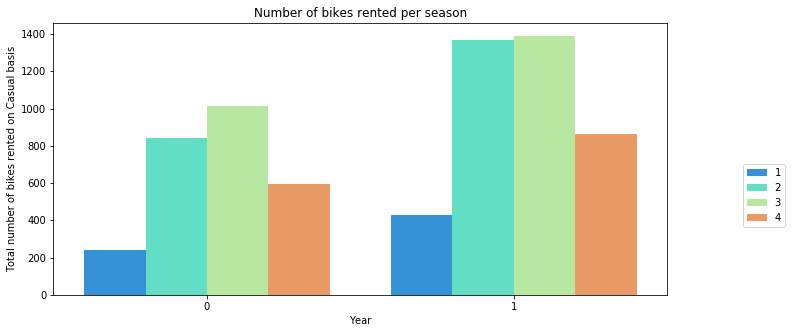

In [13]:
plt.figure(figsize=(11,5))
sns.barplot('yr','casual',hue='season', data=df_day,palette='rainbow', ci=None)
plt.legend(loc='upper right',bbox_to_anchor=(1.2,0.5))
plt.xlabel('Year')
plt.ylabel('Total number of bikes rented on Casual basis')
plt.title('Number of bikes rented per season')

Text(0.5, 1.0, 'Number of bikes rented per season')

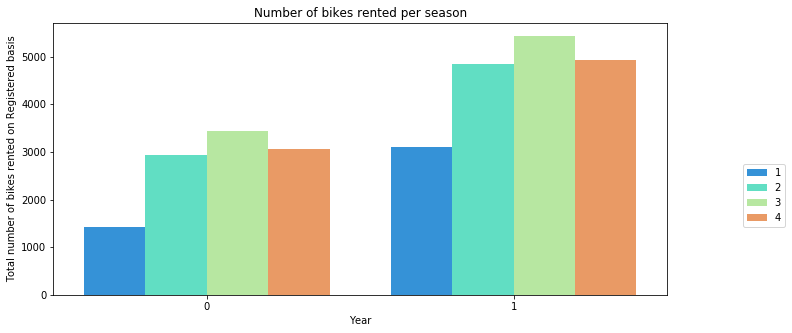

In [14]:
plt.figure(figsize=(11,5))
sns.barplot('yr','registered',hue='season', data=df_day,palette='rainbow', ci=None)
plt.legend(loc='upper right',bbox_to_anchor=(1.2,0.5))
plt.xlabel('Year')
plt.ylabel('Total number of bikes rented on Registered basis')
plt.title('Number of bikes rented per season')

Text(0.5, 1.0, 'Number of bikes rented per season')

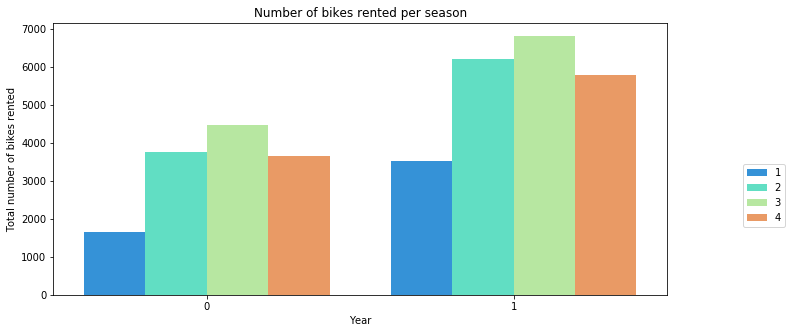

In [15]:
plt.figure(figsize=(11,5))
sns.barplot('yr','cnt',hue='season', data=df_day,palette='rainbow', ci=None)
plt.legend(loc='upper right',bbox_to_anchor=(1.2,0.5))
plt.xlabel('Year')
plt.ylabel('Total number of bikes rented')
plt.title('Number of bikes rented per season')

In [16]:
df_season_fall=df_day[df_day['season']==3]

In [17]:
df_season_fall.mnth.nunique()

4

C:\Users\chaithu\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


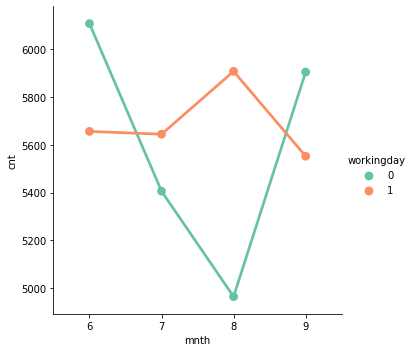

In [18]:
sns.factorplot('mnth','cnt',hue='workingday',data=df_season_fall, ci=None, palette='Set2')

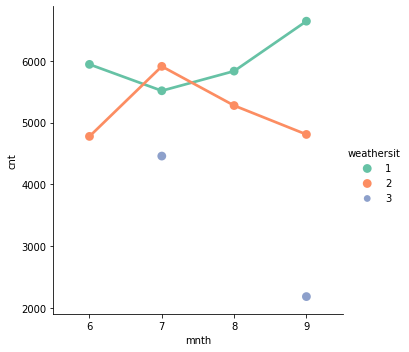

In [19]:
sns.factorplot('mnth','cnt',hue='weathersit',data=df_season_fall, ci=None, palette='Set2')

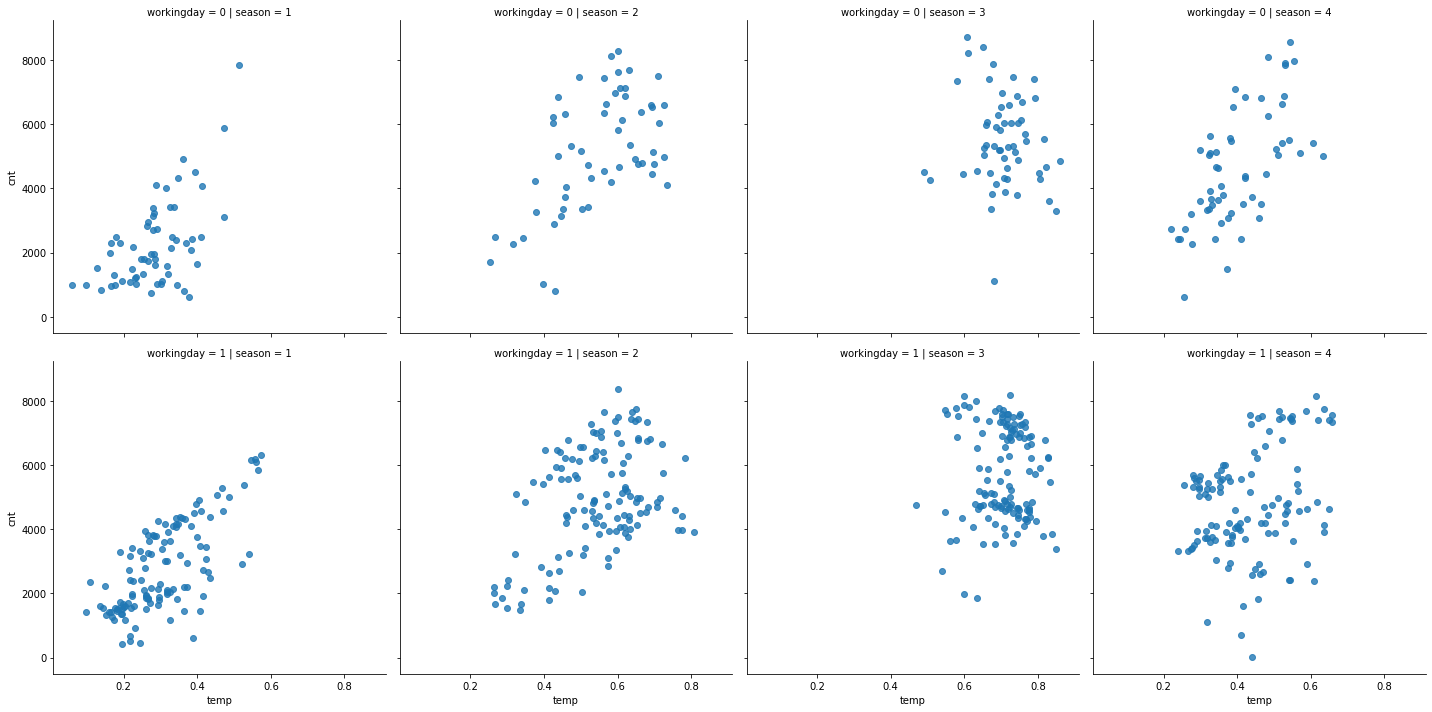

In [20]:
sns.lmplot('temp','cnt',row='workingday',col='season',data=df_day,palette='RdBu_r',fit_reg=False)

In [21]:
df_hour.drop('instant',axis=1,inplace=True)

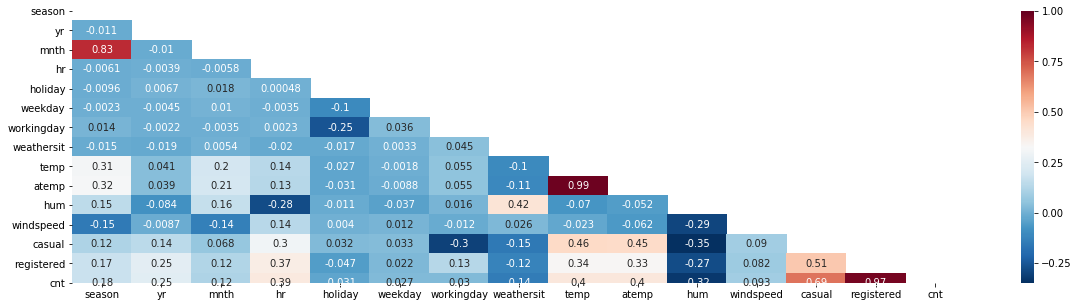

In [22]:
plt.figure(figsize=(20,5))
mask = np.zeros_like(df_hour.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_hour.corr(),cmap='RdBu_r',mask=mask, annot=True)

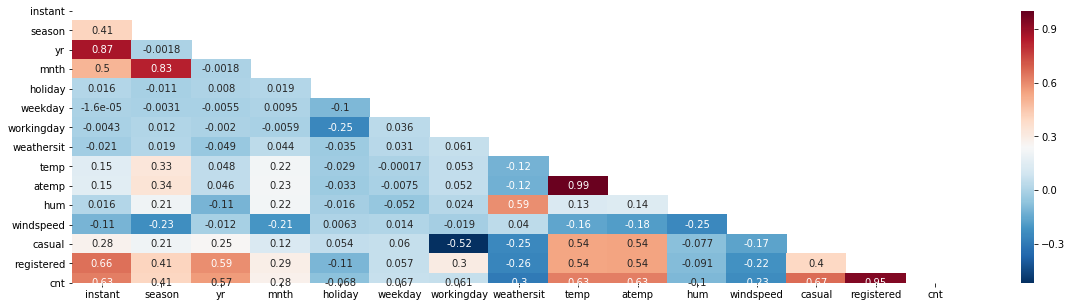

In [23]:
plt.figure(figsize=(20,5))
mask = np.zeros_like(df_day.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_day.corr(),cmap='RdBu_r',mask=mask, annot=True)

In [24]:
def data():
    global df_hour,df_day,df
    df_hour = pd.read_csv("hour.csv")
    df_day = pd.read_csv("day.csv")
    df_hour.drop('instant',axis=1,inplace=True)
    df=pd.merge(df_day,df_hour,how='left',left_on='dteday',right_on='dteday')
    return df.head(),df.columns,df.shape
data()

(   instant      dteday  season_x  yr_x  mnth_x  holiday_x  weekday_x  \
 0        1  2011-01-01         1     0       1          0          6   
 1        1  2011-01-01         1     0       1          0          6   
 2        1  2011-01-01         1     0       1          0          6   
 3        1  2011-01-01         1     0       1          0          6   
 4        1  2011-01-01         1     0       1          0          6   
 
    workingday_x  weathersit_x    temp_x  ...  weekday_y  workingday_y  \
 0             0             2  0.344167  ...          6             0   
 1             0             2  0.344167  ...          6             0   
 2             0             2  0.344167  ...          6             0   
 3             0             2  0.344167  ...          6             0   
 4             0             2  0.344167  ...          6             0   
 
    weathersit_y  temp_y  atemp_y  hum_y  windspeed_y  casual_y  registered_y  \
 0             1    0.24   0.2879

In [25]:
def statistics():
    stats=df.describe()
    null=df.isnull().sum()
    return stats,null
statistics()

(            instant      season_x          yr_x        mnth_x     holiday_x  \
 count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
 mean     367.172622      2.501640      0.502561      6.537775      0.028770   
 std      210.072051      1.106918      0.500008      3.438776      0.167165   
 min        1.000000      1.000000      0.000000      1.000000      0.000000   
 25%      185.000000      2.000000      0.000000      4.000000      0.000000   
 50%      367.000000      3.000000      1.000000      7.000000      0.000000   
 75%      549.000000      3.000000      1.000000     10.000000      0.000000   
 max      731.000000      4.000000      1.000000     12.000000      1.000000   
 
           weekday_x  workingday_x  weathersit_x        temp_x       atemp_x  \
 count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
 mean       3.003683      0.682721      1.391680      0.496987      0.475775   
 std        2.005771      0.465431    

In [26]:
def train_test():
    global X,y
    global X_train,X_test,y_train,y_test

    X=df.drop(['dteday','cnt_y'],axis=1)
    y=df['cnt_y']
    X_train, X_test, y_train, y_test= train_test_split(X,y)
    return X_train,X_test,y_train,y_test

In [27]:
def LR():
    lm=LinearRegression()
    X=df.drop(['dteday','cnt_y'],axis=1)
    y=df['cnt_y']
    X_train, X_test, y_train, y_test= train_test_split(X,y)
    lm.fit(X_train,y_train)
    predictions=lm.predict(X_test)
    res = pd.DataFrame(predictions)
    res['season_x']=X['season_x']
    res.index = X_test.index # its important for comparison
    res['predictions'] = predictions

    #res['season_x','predictions'].to_csv("prediction_results.csv")
    res.to_csv("prediction_results.csv")
    print('MAE= ', metrics.mean_absolute_error(y_test,predictions))
    print('MSE= ', metrics.mean_squared_error(y_test,predictions))
    print('RMS= ', np.sqrt(metrics.mean_squared_error(y_test,predictions)))
    r_square = metrics.r2_score(y_test,predictions)
    print('\nr_square:', r_square)
LR()

MAE=  1.2161779063686005e-13
MSE=  2.611791050817369e-26
RMS=  1.6161036633883883e-13

r_square: 1.0


In [28]:
#KNN

def KNN():
    X=df.drop(['dteday','cnt_y'],axis=1)
    y=df['cnt_y']
    X_train, X_test, y_train, y_test= train_test_split(X,y)
    regressor = KNeighborsRegressor()
    regressor.fit(X_train, y_train)
    predictions = regressor.predict(X_test)
    print('MAE= ', metrics.mean_absolute_error(y_test,predictions))
    print('MSE= ', metrics.mean_squared_error(y_test,predictions))
    print('RMS= ', np.sqrt(metrics.mean_squared_error(y_test,predictions)))
    r_square = metrics.r2_score(y_test,predictions)
    print('\nr_square:', r_square)
KNN()

MAE=  20.892704257767548
MSE=  926.7269597238204
RMS=  30.44219045541599

r_square: 0.9726196366594645


In [35]:
# Random Forest Regressor

def RFT():
    X=df.drop(['dteday','cnt_y'],axis=1)
    y=df['cnt_y']
    X_train, X_test, y_train, y_test= train_test_split(X,y)
    regressor = RandomForestRegressor(max_depth=5,n_estimators = 10, random_state = 0)
    regressor.fit(X_train, y_train)
    features = pd.DataFrame()
    features['Feature'] = X_train.columns
    features['Importance'] = regressor.feature_importances_
    features.sort_values(by=['Importance'], ascending=False, inplace=True)
    features.set_index('Feature', inplace=True)
    selector = SelectFromModel(regressor, prefit=True)
    train_reduced = selector.transform(X_train)
    new_x_train=pd.DataFrame(train_reduced,columns=['registered_y','casual_y'])
    test_reduced = selector.transform(X_test)
    new_x_test=pd.DataFrame(test_reduced,columns=['registered_y','casual_y'])
    #new_reduced=selector.transform(New_data)
    #new_data=pd.DataFrame(new_reduced,columns=['registered_y','casual_y','casual_x'])
    parameters = {'bootstrap': False,
              'min_samples_leaf': 3,
              'n_estimators': 10,
              'min_samples_split': 6,
              'max_features': 'sqrt',
              'max_depth': 5}

    rf = RandomForestRegressor(**parameters)
    rf.fit(new_x_train, y_train)
    predictions=rf.predict(new_x_test)
    
    #predictions = regressor.predict(x_test)
    
    res = pd.DataFrame(predictions)
    res.to_csv("prediction_results.csv")
    res['season_x']=X['season_x']
    #res.index = X_test.index # its important for comparison
    res['predictions'] = predictions
    res.to_csv("prediction_results.csv")
    MAE= metrics.mean_absolute_error(y_test,predictions)
    MSE=metrics.mean_squared_error(y_test,predictions)
    RMS= np.sqrt(metrics.mean_squared_error(y_test,predictions))
    r_square = metrics.r2_score(y_test,predictions)
    print('MAE= ', metrics.mean_absolute_error(y_test,predictions))
    print('MSE= ', metrics.mean_squared_error(y_test,predictions))
    print('RMS= ', np.sqrt(metrics.mean_squared_error(y_test,predictions)))
    print('\nr_square:', r_square)
    print(train_reduced)

RFT()

MAE=  11.94621450441485
MSE=  363.2011667822421
RMS=  19.057837410950963

r_square: 0.9894866695991562
[[ 21. 288.]
 [ 40. 139.]
 [ 28.  66.]
 ...
 [ 50. 109.]
 [  2.   3.]
 [ 28. 410.]]


In [32]:
X_train

NameError: name 'X_train' is not defined

In [30]:
# Lasso
from sklearn.linear_model import Lasso
def lasso():
    X=df.drop(['dteday','cnt_y'],axis=1)
    y=df['cnt_y']
    X_train, X_test, y_train, y_test= train_test_split(X,y)
    lassoReg= Lasso(alpha=0.1, normalize=True)
    lassoReg.fit(X_train,y_train)
    predictions = lassoReg.predict(X_test)
    print('MAE= ', metrics.mean_absolute_error(y_test,predictions))
    print('MSE= ', metrics.mean_squared_error(y_test,predictions))
    print('RMS= ', np.sqrt(metrics.mean_squared_error(y_test,predictions)))
    r_square = metrics.r2_score(y_test,predictions)
    print('\nr_square:', r_square)
    
lasso()

MAE=  10.104595974862896
MSE=  166.40394209041875
RMS=  12.899765195166102

r_square: 0.9948148695692619


In [31]:
from sklearn.preprocessing import MinMaxScaler
list=[[285,4,0,10,0,3,1,3,0.543333,0.517717,0.906250,0.248150,217,2199,2416,4,0,10,19,0,3,1,3,0.54,0.5152,0.94,0.1343,7,102]]
sc=MinMaxScaler()
sc.fit_transform(list)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])